In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
import os
import instructions


#path = os.path.split(os.getcwd())
#data_directory = os.path.join(path[0], 'data\\raw')
#data_directory

In [2]:
path = os.path.split(os.getcwd())
data_directory = os.path.join(path[0], 'data\\raw')
#data_directory = os.path.join(os.getcwd(), 'data\\raw')


X = instructions.load_csv(data_directory, 'train_data')
y = instructions.load_csv(data_directory, 'train_labels')

In [3]:
y = pd.read_pickle(f'{data_directory}/y.pkl')

In [ ]:
from sklearn.preprocessing import binarize

y_binar = binarize(y)
y = pd.DataFrame(np.ravel(y_binar))

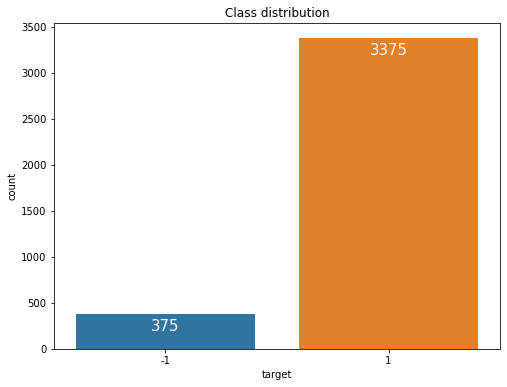

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=y)
ax.set(title="Class distribution")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   size = 15,
                   color='white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.savefig("class_distribution.jpg")

In [ ]:
# saving figure
with open(f'{data_directory}/reports/figures/fig_01.png', 'wb') as f:
  pkl.dump(fig, f)

In [4]:
X = pd.read_pickle(f'{data_directory}/data/raw/X.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Marta\\Desktop\\Studia\\CDV\\IV semestr 2022L\\Wykorzystanie Pythona w uczeniu maszynowym\\ml_project\\project\\ML_PROJECT_2022\\data\\raw/data/raw/X.pkl'

In [ ]:
corr_xy = pd.DataFrame(X.corrwith(y['target']).sort_values(ascending=False))

In [ ]:
fig = plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_xy.head(100), annot=False)

In [ ]:
# saving figure
with open(f'{data_directory}/reports/figures/fig_02.png', 'wb') as f:
  pkl.dump(fig, f)

In [5]:
X_prep = pd.read_pickle(f'{data_directory}\\X_preprocessed.pkl')

In [ ]:
from sklearn.preprocessing import StandardScaler



In [6]:
from sklearn.decomposition import PCA

In [23]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit(X_prep)

In [24]:
import plotly.express as px
import numpy as np


exp_var_cumul = np.cumsum(X_pca.explained_variance_ratio_)

In [44]:
import altair as alt


source = pd.DataFrame({'x' : range(1, exp_var_cumul.shape[0] + 1), 'y' : exp_var_cumul})

chart = alt.Chart(source).mark_line().encode(
        alt.X('x', title="Components"),
        alt.Y('y', title="Explainable variance"),
        tooltip = [alt.Tooltip('x', title='Components'),
                   alt.Tooltip('y', title='Explainable variance')])

line = alt.Chart(pd.DataFrame({'y': [0.95]})).mark_rule(strokeDash=[10,10], color='red').encode(y='y')

text = alt.Chart(source.query("y >= 0.95").head(1)).mark_text(dy=15, color='black').encode(x=alt.X('x'), y=alt.Y('y'), text=alt.Text('x'))

fig = alt.layer(chart.interactive(), line, text)

In [45]:
fig

alt.LayerChart(...)

In [7]:
X_pca = pca.transform(X_prep)

# Show results
print('Original number of features:', X_prep.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 10000
Reduced number of features: 3074


In [8]:
import plotly.express as px

pca = PCA(n_components=2)
components = pca.fit_transform(X_prep)

fig = px.scatter(components, x=0, y=1, color=y['target'])
fig.show()